## 부산 5대 범죄 관할구별 발생 시각화

In [177]:
# 라이브러리 import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
# 한글 깨짐 문제 해결

from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()  
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [179]:
sns.set(font='NanumGothicCoding', rc={'axes.unicode_minus':False}, style='darkgrid')

### 연도별 5대 범죄 시각화

##### 데이터 불러오기 & 전처리

In [180]:
bsCrime18 = pd.read_csv('./data/18_BusanCrime.csv', encoding='utf-8')
bsCrime18.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)    #inplace: 덮어쓰기 여부
bsCrime18['연도'] = 2018

bsCrime19 = pd.read_csv('./data/19_BusanCrime.csv', encoding='utf-8')
bsCrime19.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)    
bsCrime19['연도'] = 2019

bsCrime20 = pd.read_csv('./data/20_BusanCrime.csv', encoding='utf-8')
bsCrime20.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True) 
bsCrime20['연도'] = 2020

bsCrime21 = pd.read_csv('./data/21_BusanCrime.csv', encoding='utf-8')
bsCrime21.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)  
bsCrime21['연도'] = 2021

df4y = pd.concat([bsCrime18, bsCrime19, bsCrime20, bsCrime21], axis=0, ignore_index=True)

df4y['합계'] = df4y['살인'] + df4y['강도'] + df4y['성범죄'] + df4y['절도'] + df4y['폭력']
df4y = df4y.drop(columns=['구분', '연번'])
df4y.head()

,관서명,살인,강도,성범죄,절도,폭력,연도,합계
0,중부,1,2,47,954,784,2018,1788
1,동래,3,6,89,1078,1375,2018,2551
2,영도,4,2,43,329,666,2018,1044
3,동부,0,5,63,576,823,2018,1467
4,부산진,1,17,321,2376,3253,2018,5968


In [181]:
# 연도 및 관할서별 5대 범죄 횟수 그룹화
pd.pivot_table(df4y, index=['연도', '관서명'], aggfunc='sum').head()

강도  살인  성범죄    절도    폭력    합계
연도   관서명                               
2018 강서    1   2   46   501   499  1049
     금정    7   4   87   595   936  1629
     기장    2   3   38   415   772  1230
     남부   10   8  185  1458  2091  3752
     동래    6   3   89  1078  1375  2551

In [182]:
# 연도별 총 5대 범죄 횟수
byYear = pd.pivot_table(df4y, index=['연도'], aggfunc='sum', margins=True).reset_index()
byYear = byYear.drop(columns=['관서명'])
byYear

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13884\3841623892.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  byYear = pd.pivot_table(df4y, index=['연도'], aggfunc='sum', margins=True).reset_index()


,연도,강도,살인,성범죄,절도,폭력,합계
0,2018,91,53,1533,14261,19503,35441
1,2019,82,63,1470,14491,20649,36755
2,2020,39,51,1416,14169,19056,34731
3,2021,51,46,1338,12670,16094,30199
4,All,263,213,5757,55591,75302,137126


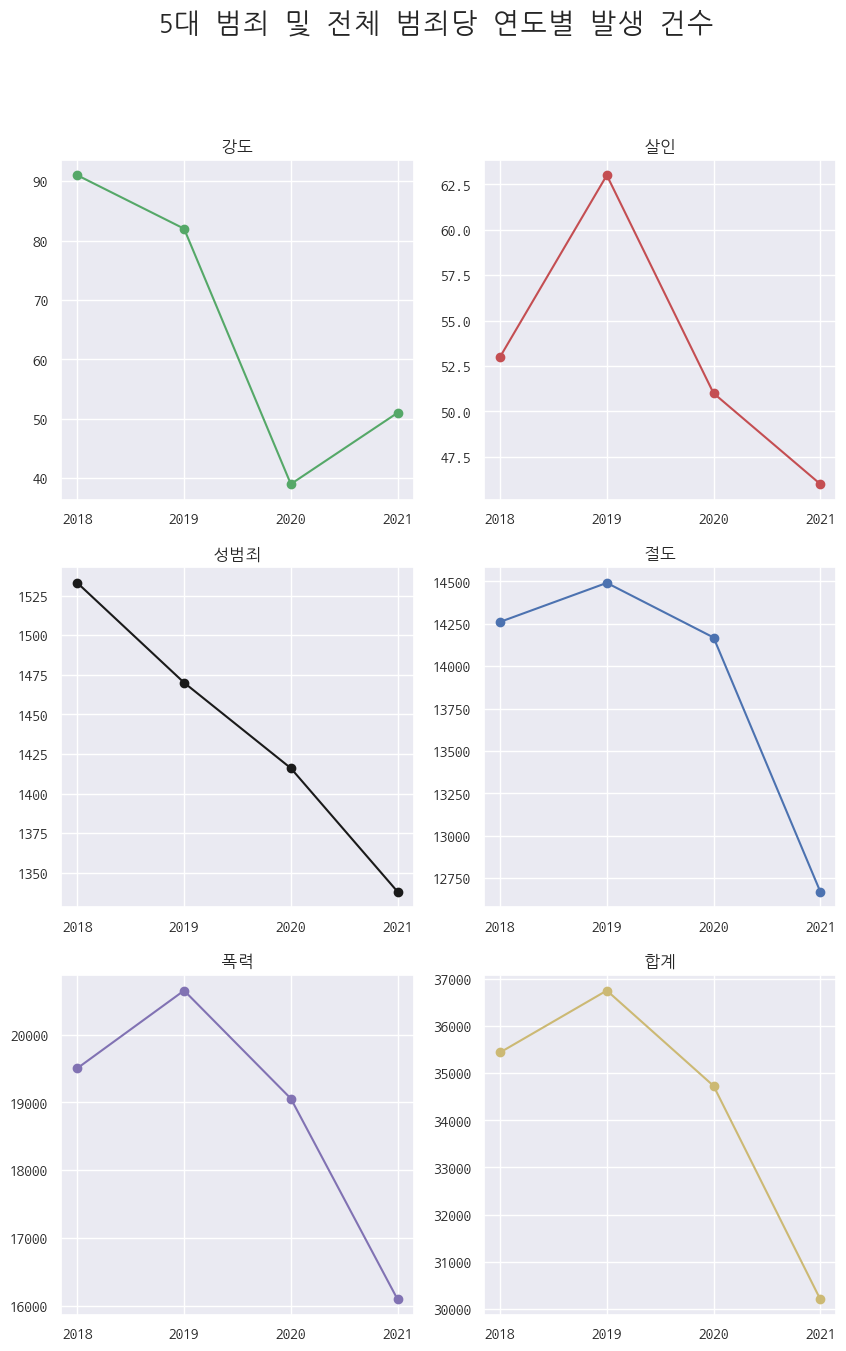

In [183]:
# 연도별 5대 범죄 시각화
x = ['2018', '2019', '2020', '2021']
colorList = ['go-', 'ro-', 'ko-', 'bo-', 'mo-', 'yo-']
col = byYear.columns
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.flatten()

for i in range(6):
    ax[i].plot(x, byYear[col[i+1]].iloc[:4], colorList[i])
    ax[i].set_title(col[i+1])
fig.suptitle('5대 범죄 및 전체 범죄당 연도별 발생 건수', fontsize=20)
plt.show()

### 관서별 5대 범죄 시각화

In [184]:
# 관서별 5대 범죄 4개년 총계
byDistrict4y = df4y.groupby(['관서명']).sum().drop(columns=['연도', '합계'])
byDistrict4y.head()

,살인,강도,성범죄,절도,폭력
관서명,,,,,
강서,6,7,156,1774,2078
금정,21,22,320,3352,3896
기장,5,4,178,1993,2926
남부,27,25,646,5538,7919
동래,14,15,380,3956,5292


In [185]:
# sklearn의 MinMaxScaler를 통해 각 항목의 최댓값을 1, 최솟값을 0으로 설정해 관서별 범죄 발생율의 상대적 위치 확인
# 1에 해당하는 곳이 가장 많이 발생한 곳, 0이 제일 적게 발생한 곳을 의미
col = byDistrict4y.columns
x = byDistrict4y[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x.astype(float))
criNor = pd.DataFrame(x_scaled, columns=col, index=byDistrict4y.index)
criNor.head()

,살인,강도,성범죄,절도,폭력
관서명,,,,,
강서,0.086957,0.069767,0.027593,0.054088,0.000000
금정,0.739130,0.418605,0.183635,0.252579,0.177210
기장,0.043478,0.000000,0.048525,0.081635,0.082659
남부,1.000000,0.488372,0.493815,0.527547,0.569354
동래,0.434783,0.255814,0.240723,0.328553,0.313286


<Axes: xlabel='관서명'>

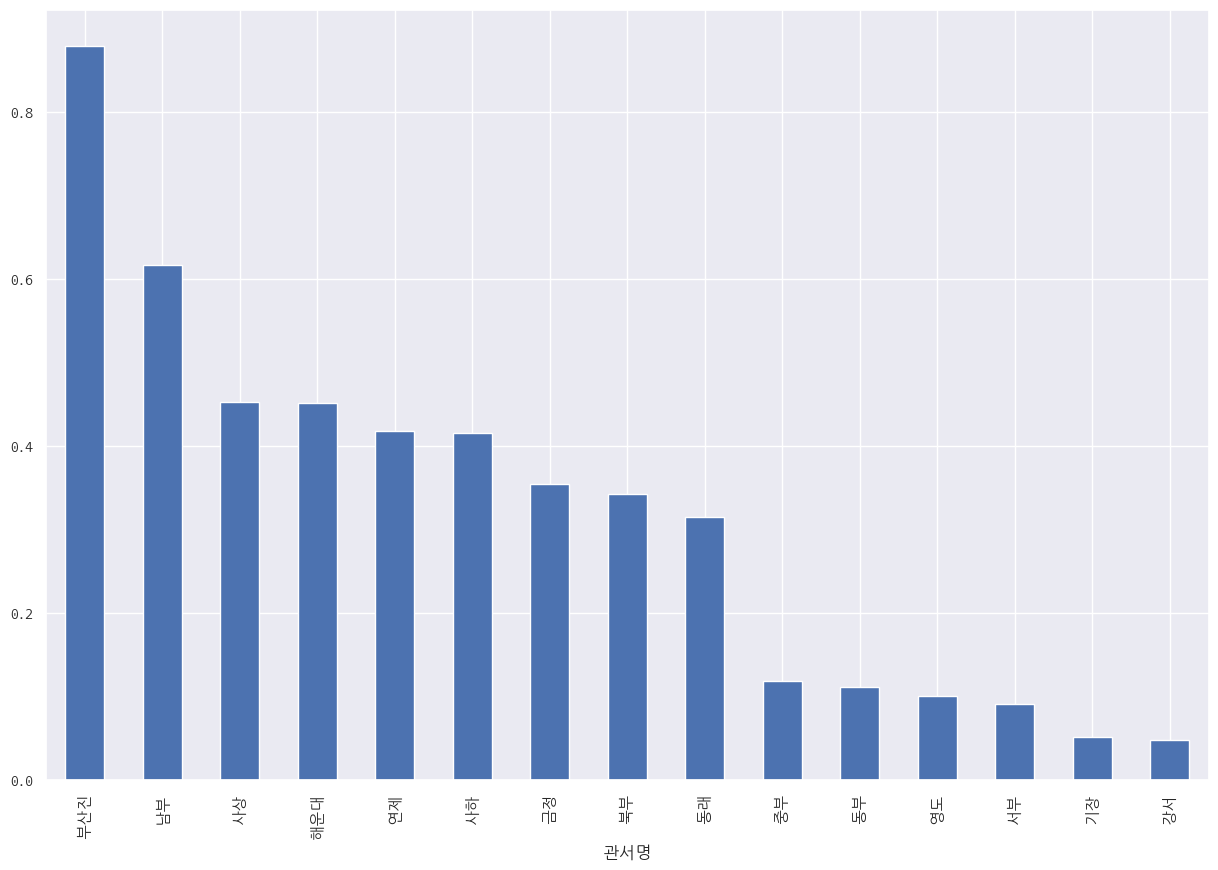

In [186]:
# 범죄별 상대적 위치를 평균화하여 막대 그래프로 비교
criNor['평균'] = np.sum(criNor[col], axis=1) / 5
criSort = criNor.sort_values('평균', ascending=False)
criSort = criSort.iloc[:,5]
criSort.plot.bar(figsize =(15, 10))

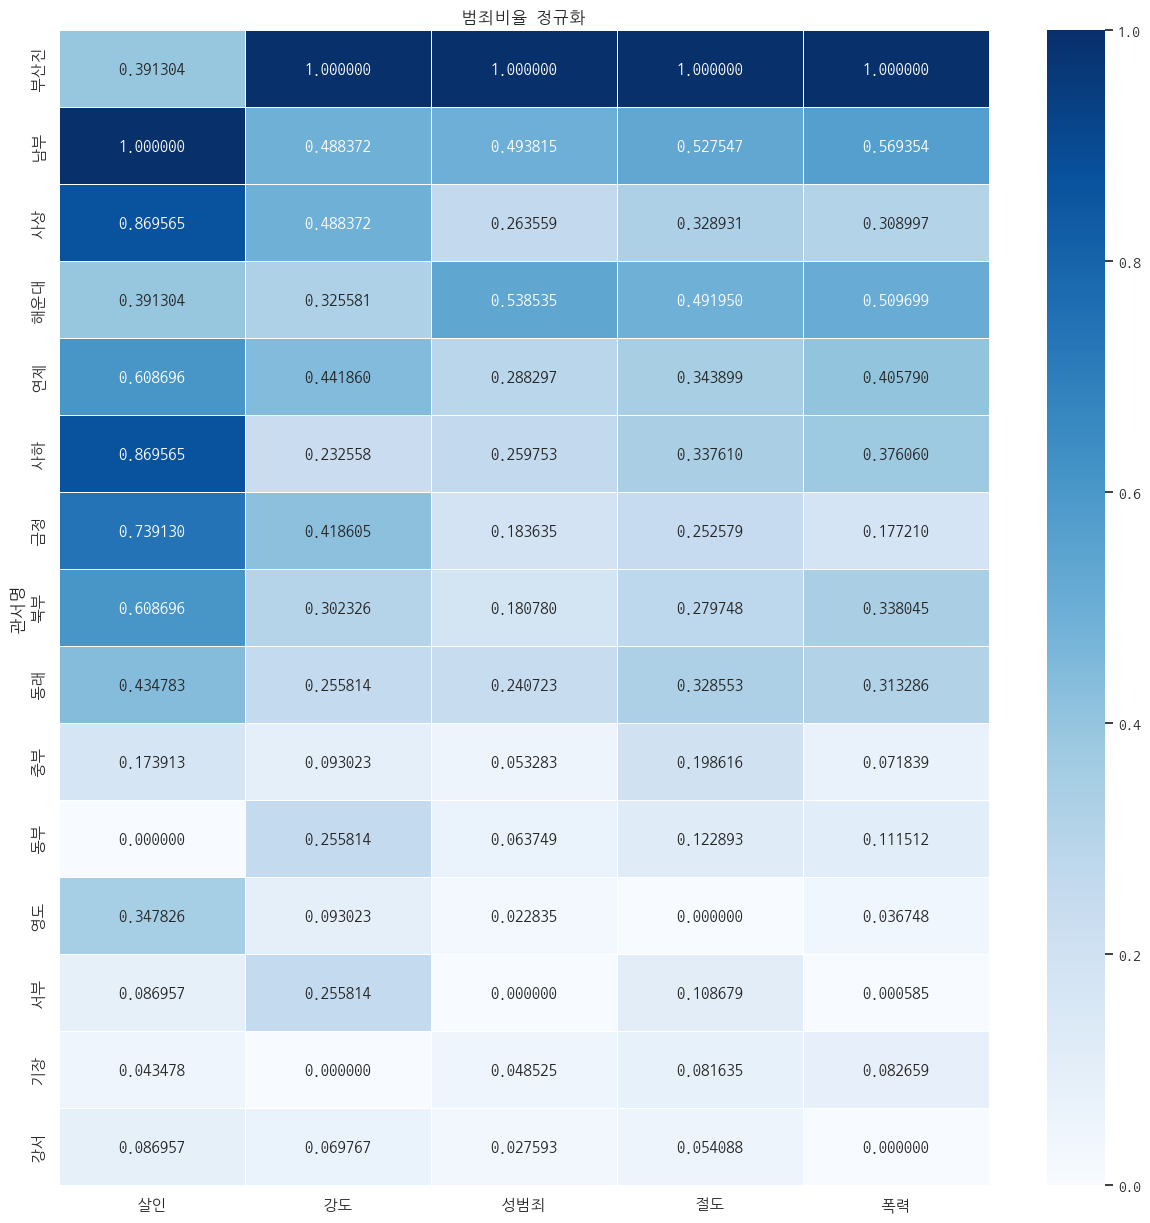

In [187]:
# 히트맵으로 MinMaxScaler된 값 표현
crimeNormSort = criNor.sort_values(by='평균', ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(crimeNormSort[col], annot=True, fmt='f', linewidths=.5, cmap='Blues')
plt.title('범죄비율 정규화')
plt.show()

### 행정구역별 인구 만 명 당 5대 범죄 시각화

In [188]:
# 만 명 당 범죄 횟수 구해 인구 대비 범죄율 확인
# 수영구의 인구를 5개 동으로 나눠서 관할인 연제구와 남구에 비중대로 배분

# 관할구 컬럼 배정
byDistrict4y['관할구'] = ['강서구', '금정구', '기장군', '남구', '동래구', '동구', '부산진구', '북구', '사상구', '사하구', '서구', '연제구', '영도구', '중구', '해운대구']
byDistrict4y.head()

,살인,강도,성범죄,절도,폭력,관할구
관서명,,,,,,
강서,6,7,156,1774,2078,강서구
금정,21,22,320,3352,3896,금정구
기장,5,4,178,1993,2926,기장군
남부,27,25,646,5538,7919,남구
동래,14,15,380,3956,5292,동래구


In [189]:
# 행정구역별 인구수 데이터 불러옴
popDf = pd.read_excel('./data/행정구역별인구수.xlsx', header=1)
popDf['행정구역(시군구)별'] = popDf['행정구역(시군구)별'].str.strip()
popDf.columns   # 컬럼명 확인 - ['행정구역(시군구)별', '총인구수 (명)', '남자인구수 (명)', '여자인구수 (명)']

byDistrict4y = pd.merge(byDistrict4y, popDf[['행정구역(시군구)별', '총인구수 (명)']], left_on='관할구', 
                        right_on='행정구역(시군구)별', how='inner')

del byDistrict4y['행정구역(시군구)별']  # 중복컬럼 제거

c:\DEV\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [190]:
popDf = popDf.set_index('행정구역(시군구)별')
syNum = popDf.loc['수영구', '총인구수 (명)']

byDistrict4y.set_index('관할구', inplace=True)
byDistrict4y

byDistrict4y.loc['연제구', '총인구수 (명)'] += int(syNum*(2/5))
byDistrict4y.loc['남구', '총인구수 (명)'] += int(syNum*(3/5))

byDistrict4yPer = byDistrict4y.iloc[:,:5]

byDistrict4yPer = byDistrict4yPer / np.array(byDistrict4y['총인구수 (명)'])[:, None]*10000/4
byDistrict4yPer

,살인,강도,성범죄,절도,폭력
관할구,,,,,
강서구,0.104115,0.121468,2.706999,30.783433,36.058610
금정구,0.234676,0.245851,3.576010,37.458708,43.537926
기장군,0.070354,0.056283,2.504615,28.043248,41.171372
남구,0.185460,0.171722,4.437301,38.039894,54.394714
동래구,0.127380,0.136478,3.457450,35.993871,48.149537
동구,0.113829,0.426859,5.520711,66.049334,91.689338
부산진구,0.092478,0.334343,8.379904,66.114456,87.761356
북구,0.160561,0.151641,2.827651,31.826680,49.470507
사상구,0.292274,0.304452,4.919941,48.212990,63.910525


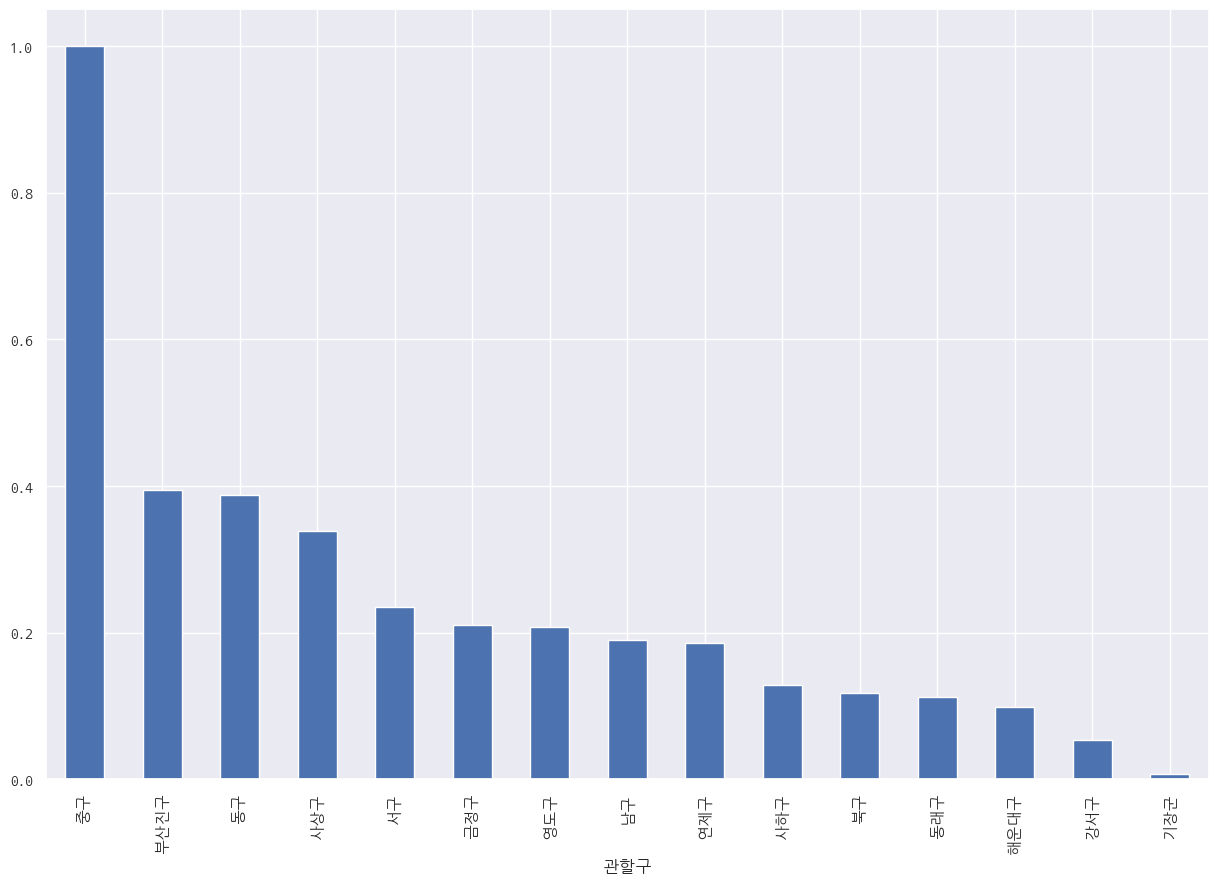

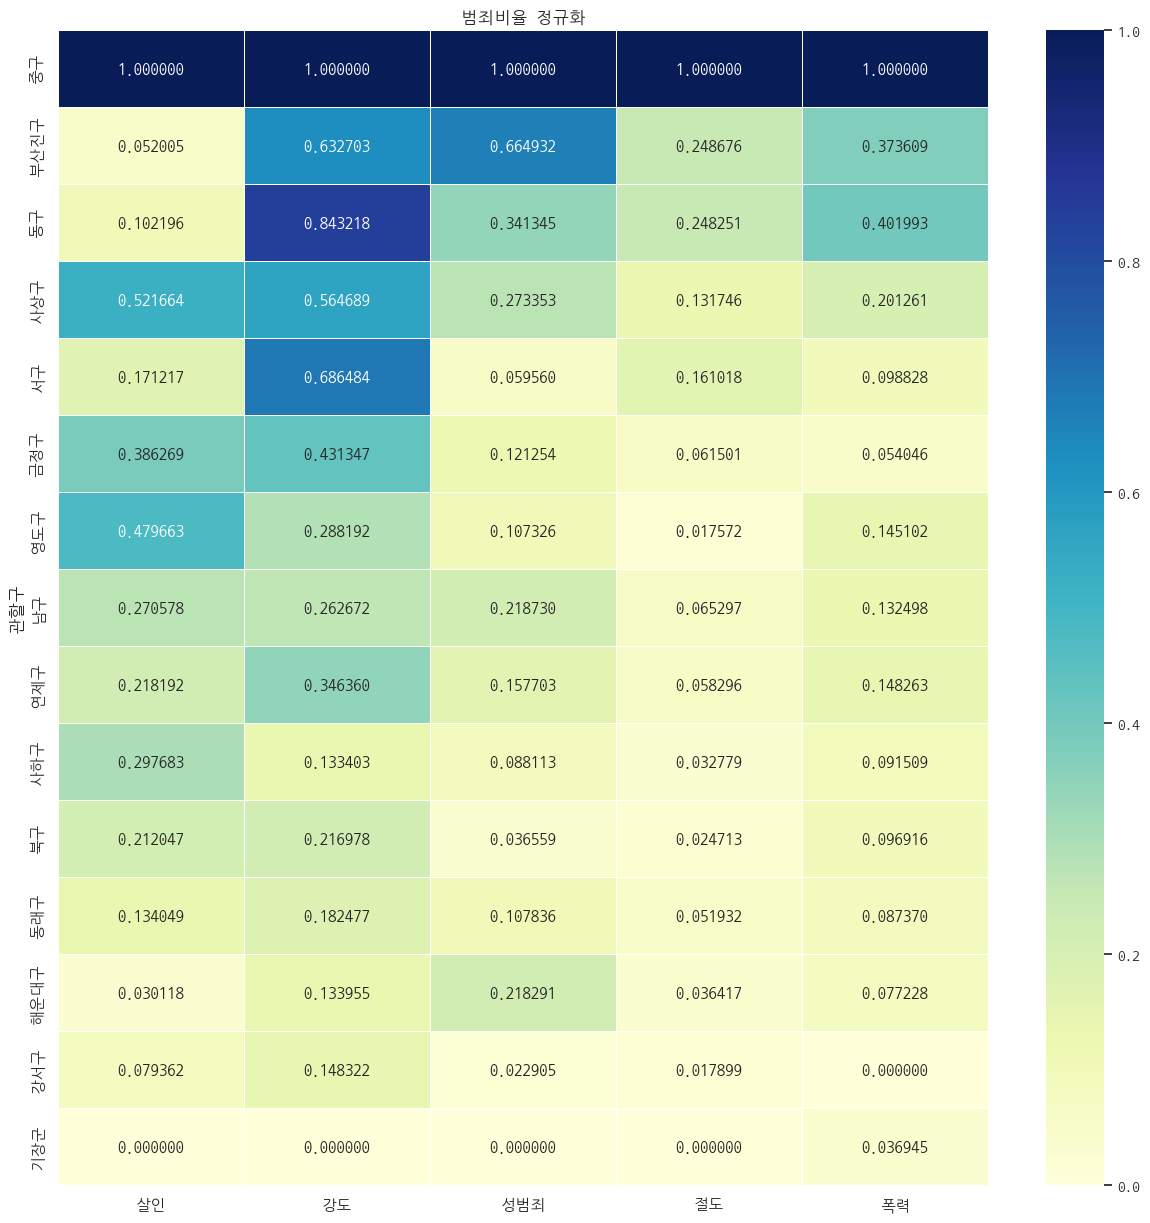

In [191]:
col = byDistrict4yPer.columns
x = byDistrict4yPer[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x.astype(float))
criNor = pd.DataFrame(x_scaled, columns=col, index=byDistrict4yPer.index)
criNor['평균'] = np.sum(criNor[col], axis=1) / 5
criSort = criNor.sort_values('평균', ascending=False)
criSort = criSort.iloc[:, 5]
criSort.plot.bar(figsize=(15, 10))
crimeNormSort = criNor.sort_values(by='평균', ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(crimeNormSort[col], annot=True, fmt='f', linewidths=.5, cmap='YlGnBu')
plt.title('범죄비율 정규화')
plt.show()

### 범죄 - 장소별 시각화

##### 데이터 불러오기 & 전처리

In [192]:
criArea = pd.read_csv('./data/crime_area.csv', encoding='utf-8')
criArea.head()

,범죄대분류,범죄중분류,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,95,95,0,59,0,1,1,0,...,1,8,1,0,0,0,7,0,1,44
1,강력범죄,살인미수등,90,102,3,126,0,0,1,0,...,2,6,1,0,0,0,5,0,2,113
2,강력범죄,강도,138,182,2,423,0,26,154,1,...,6,4,0,0,0,0,44,2,6,263
3,강력범죄,강간,882,954,0,249,0,0,4,0,...,21,34,0,2,0,3,52,42,3,763
4,강력범죄,유사강간,68,63,0,30,0,0,0,0,...,1,1,0,0,0,0,12,11,1,66


In [193]:
# 강력, 절도, 폭력범죄(16행)까지만 추출
criAreaData = criArea[: 17]

# '기타'열 제거
criAreaData = criAreaData.drop(['기타', '단독주택', '사무실', '상점'], axis=1)

# 장소별 발생건수 sum값 리스트화
listSum = []
for i in criAreaData:
    listSum.append(criAreaData[i].sum())
    listSum = listSum[1:]
    listSum.insert(0, 0)

# 마지막 행에 sum값 추가
criAreaData.loc['Sum'] = listSum

##### 막대 그래프 그리기

Text(0.5, 1.0, '장소별 범죄 발생 횟수')

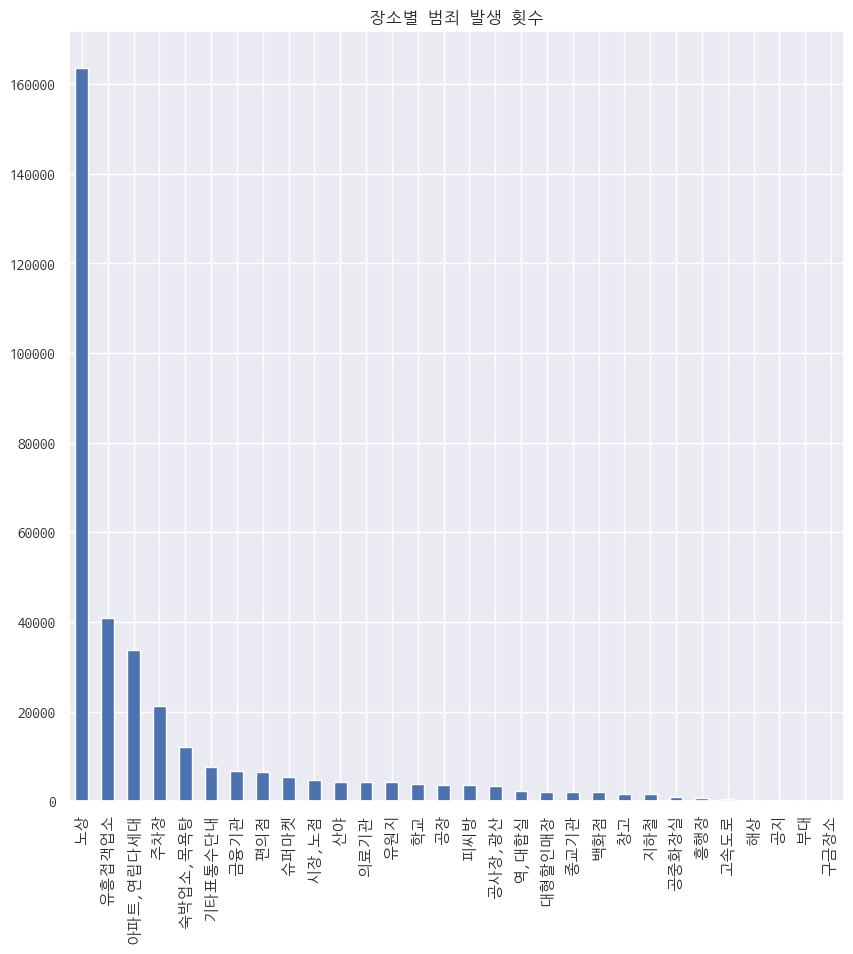

In [194]:
# 장소별 범죄 현황 / 막대 그래프 나타내기
criAreaSum = criAreaData.loc['Sum']
criAreaSum = criAreaSum.iloc[2:]
criAreaSum = criAreaSum.sort_values(ascending=False)
criAreaSum.plot.bar(figsize=(10, 10))
plt.title('장소별 범죄 발생 횟수')

##### 범죄 발생수가 높은 장소 확인

In [195]:
# 범죄별로 데이터 합치기
criAreaData = criAreaData.groupby(['범죄대분류']).sum()
criAreaData = criAreaData.drop(index=0, axis=0).drop(['범죄중분류'], axis=1)
criAreaData

,"아파트,연립다세대",고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,"시장,노점","숙박업소,목욕탕",유흥접객업소,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,2670,17,4469,11,99,322,16,145,2454,2187,...,242,88,94,4,7,3,5,285,161,59
절도범죄,14333,177,49527,1828,4718,4579,1966,2998,6736,13952,...,2077,1258,2705,40,34,1,94,11464,462,2987
폭력범죄,16774,273,109581,139,595,1617,93,1616,2836,24774,...,1921,715,1587,153,74,20,59,9494,216,576


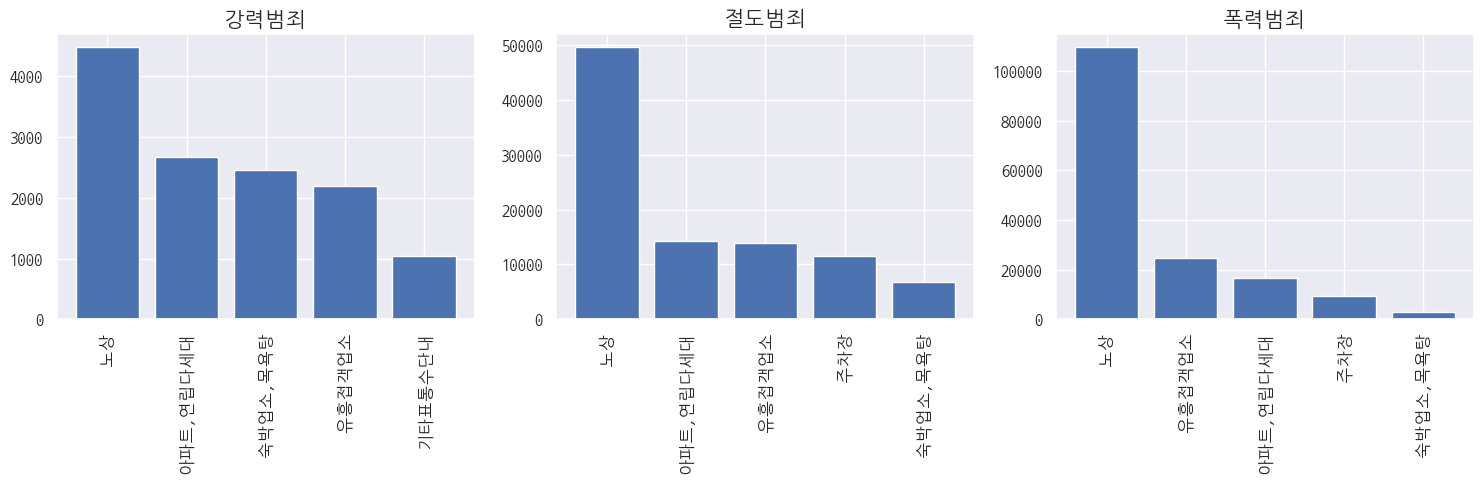

In [196]:
# 막대 그래프 그리기
plt.figure(figsize=(15, 5))

for i in range(len(criAreaData.index)):
    aList = criAreaData.iloc[i].sort_values(ascending=False)
    top5AList = aList.nlargest(5)
    idx = top5AList.index
    val = top5AList.values
    
    plt.subplot(1, len(criAreaData.index), i+1)
    plt.bar(idx, val)
    plt.title(criAreaData.index[i], fontsize=15)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

##### 노상 제외 범죄별 발생장소 Top5 / pie chart

In [197]:
from tkinter.tix import DECREASING

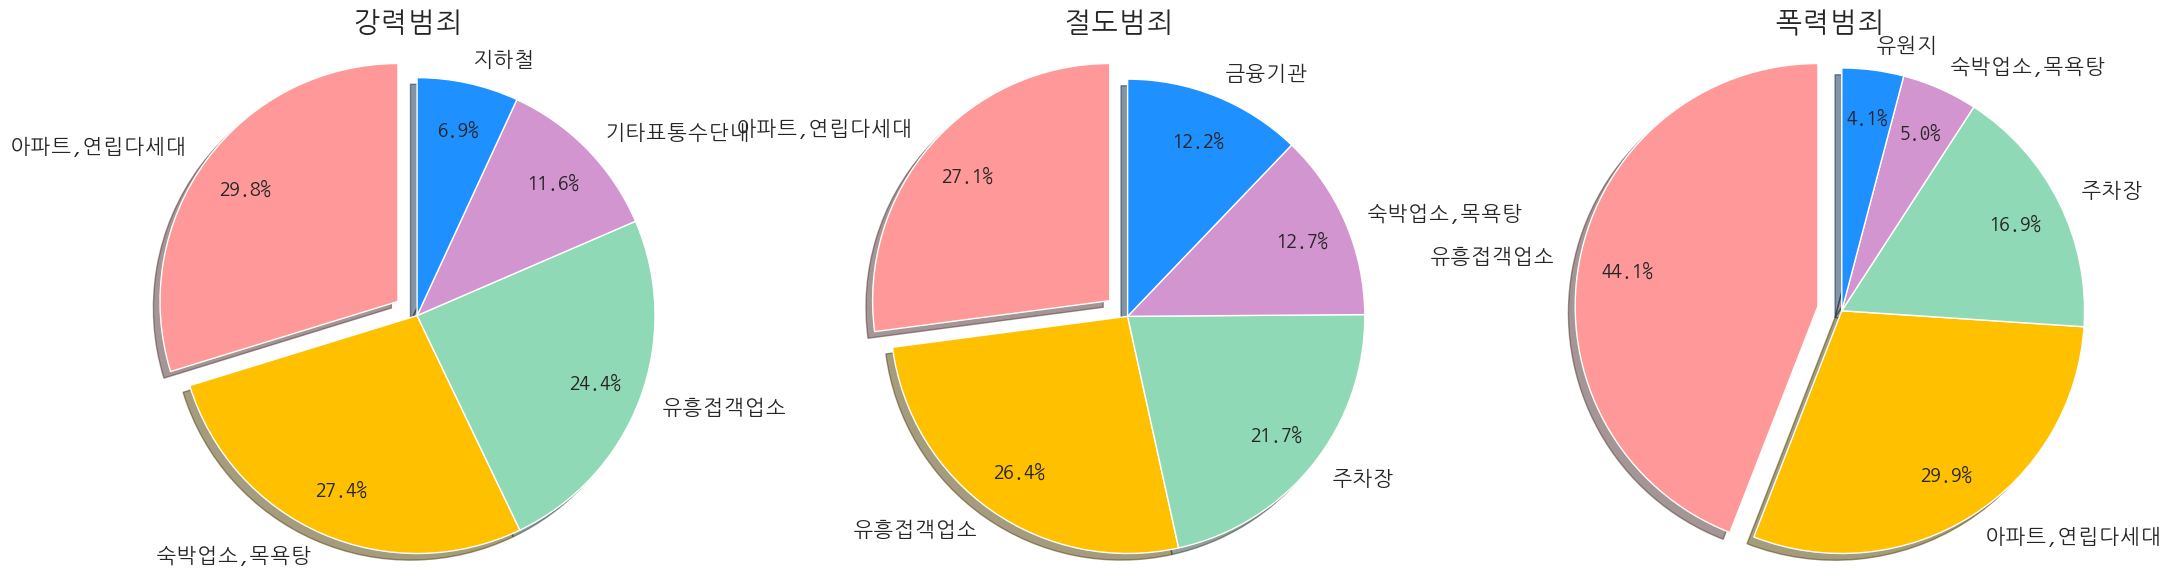

In [198]:
dropNs = criAreaData.drop(['노상'], axis=1)
fig, axs = plt.subplots(1, 3, figsize=(26, 7))
for i in range(len(dropNs.index)):
    aList = dropNs.iloc[i]
    aList = aList.nlargest(5)
    top5AList = aList.nlargest(5)
    ins = list(top5AList.index)
    val = top5AList.values
    ax = axs[i]
    explode = (0.1, 0, 0, 0, 0)
    colors = ('#ff9999','#ffc000','#8fd9b6','#d395d0','dodgerblue')
    ax.pie(val, labels=ins, autopct='%.1f%%', explode=explode, pctdistance=0.8, shadow=True, startangle=90,
        textprops={'fontsize':15}, colors=colors)
    ax.axis('equal')
    ax.set_title(dropNs.index[i], fontsize=20)

### 범죄 - 시간 및 요일별 시각화

In [199]:
criTime = pd.read_csv('./data/crime_time.csv', encoding='euc-kr')
criTime = criTime[:17]
criTime = criTime.groupby(['범죄대분류']).sum()
criTime = criTime.drop(['미상'], axis=1).drop(['범죄중분류'], axis=1)
criTime

,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59,일,월,화,수,목,금,토
범죄대분류,,,,,,,,,,,,,,,
강력범죄,2920,3316,1977,1799,1966,2447,3089,4215,4081,3519,3607,3634,3445,3880,4310
절도범죄,13088,14167,13094,21501,27167,28553,27229,20568,25466,26239,25671,26061,26098,28156,29266
폭력범죄,31290,26880,17572,23112,23919,28939,39618,57944,45295,38034,38553,38905,39086,41198,46842


In [200]:
crimeTimeD = criTime.iloc[:, 8:]    #요일별 범죄
crimeTimeD = crimeTimeD.T
crimeTimeD = crimeTimeD.reindex(index=['월', '화', '수', '목', '금', '토', '일'])
crimeTimeD

범죄대분류,강력범죄,절도범죄,폭력범죄
월,3519,26239,38034
화,3607,25671,38553
수,3634,26061,38905
목,3445,26098,39086
금,3880,28156,41198
토,4310,29266,46842
일,4081,25466,45295


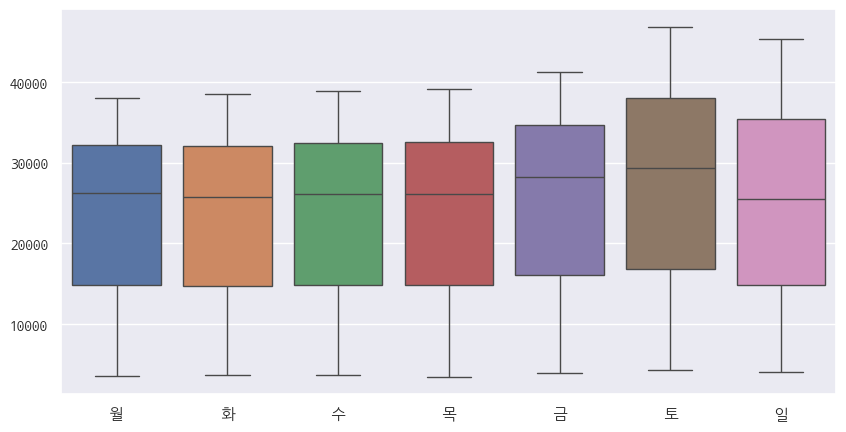

In [201]:
# 요일별 범죄수를 boxplot으로 비교
total = crimeTimeD.T
plt.figure(figsize=(10, 5))
sns.boxplot(data=total)
plt.show()

In [202]:
row = ['월', '화', '수', '목', '금', '토', '일']
column = ['강력범죄', '절도범죄', '폭력범죄']

scaler = preprocessing.MinMaxScaler()
scaler.fit(crimeTimeD)
crimeTimeDScaled = scaler.transform(crimeTimeD)

crimeTimeDScaled = pd.DataFrame(data=crimeTimeDScaled, index=row, columns=column)
crimeTimeDScaled

,강력범죄,절도범죄,폭력범죄
월,0.085549,0.203421,0.000000
화,0.187283,0.053947,0.058924
수,0.218497,0.156579,0.098887
목,0.000000,0.166316,0.119437
금,0.502890,0.707895,0.359219
토,1.000000,1.000000,1.000000
일,0.735260,0.000000,0.824364


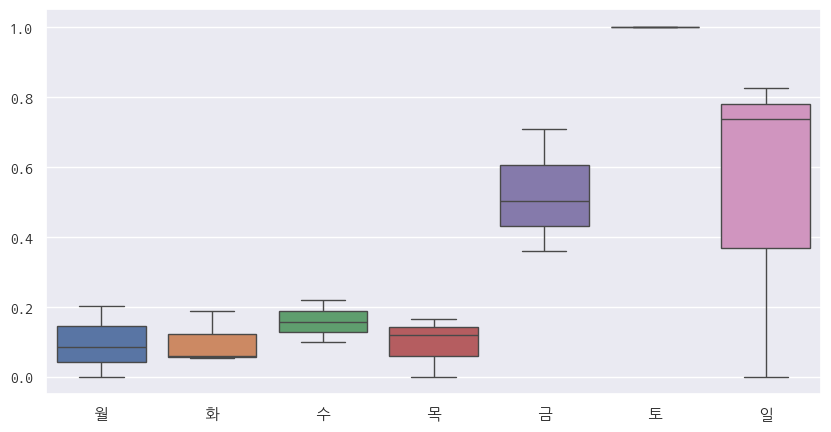

In [203]:
# 요일별 범죄를 boxplot으로 비교(정규화값으로 비교)
total = crimeTimeDScaled.T
plt.figure(figsize=(10, 5))
sns.boxplot(data=total)
plt.show()

- 강력, 절도, 폭력범죄는 토요일에 가장 많이 발생
- 비교적 평일보다 주말이 범죄가 더 많이 일어남

In [204]:
# 요일별 범죄 발생 비교 시각화
x = crimeTimeDScaled.index
y1 = crimeTimeDScaled['강력범죄'].values
y2 = crimeTimeDScaled['절도범죄'].values
y3 = crimeTimeDScaled['폭력범죄'].values

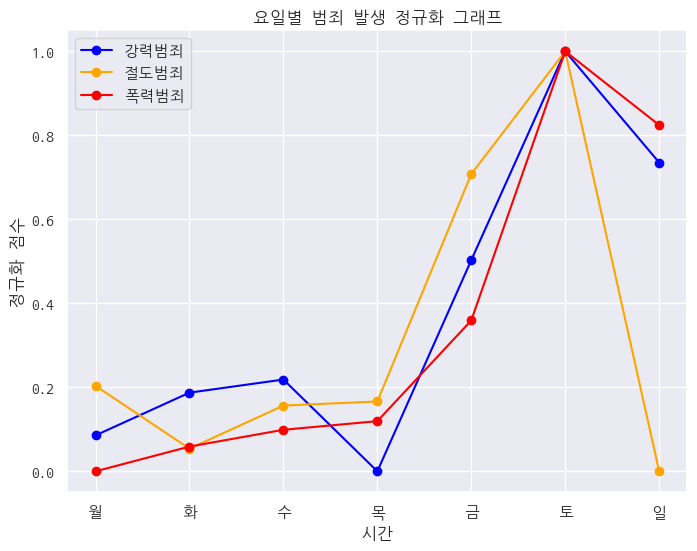

In [205]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y1, c='blue', marker='o', label='강력범죄')
ax.plot(x, y2, c='orange', marker='o', label='절도범죄')
ax.plot(x, y3, c='red', marker='o', label='폭력범죄')

ax.set_title('요일별 범죄 발생 정규화 그래프')
ax.set_xlabel('시간')
ax.set_ylabel('정규화 점수')
ax.legend()

In [206]:
crimeTimeT = criTime.iloc[:,:8]   #시간대별 범죄
crimeTimeT = crimeTimeT.T
crimeTimeT

범죄대분류,강력범죄,절도범죄,폭력범죄
00:00-02:59,2920,13088,31290
03:00-05:59,3316,14167,26880
06:00-08:59,1977,13094,17572
09:00-11:59,1799,21501,23112
12:00-14:59,1966,27167,23919
15:00-17:59,2447,28553,28939
18:00-20:59,3089,27229,39618
21:00-23:59,4215,20568,57944


In [207]:
# 정규화
row = ['00:00-02:59', '03:00-05:59', '06:00-08:59', '09:00-11:59','12:00-14:59', '15:00-17:59',
       '18:00-20:59', '21:00-23:59']
column = ['강력범죄', '절도범죄', '폭력범죄']

scaler = preprocessing.MinMaxScaler()

scaler.fit(crimeTimeT)
crimeTimeTScaled = scaler.transform(crimeTimeT)
crimeTimeTScaled = pd.DataFrame(data=crimeTimeTScaled, index=row, columns=column)
crimeTimeTScaled

,강력범죄,절도범죄,폭력범죄
00:00-02:59,0.463990,0.000000,0.339790
03:00-05:59,0.627897,0.069770,0.230556
06:00-08:59,0.073675,0.000388,0.000000
09:00-11:59,0.000000,0.544003,0.137224
12:00-14:59,0.069123,0.910378,0.157213
15:00-17:59,0.268212,1.000000,0.281557
18:00-20:59,0.533940,0.914387,0.546072
21:00-23:59,1.000000,0.483673,1.000000


- 절도범죄는 오전 6시 ~ 오후 6시까지 증가
- 강력범죄, 폭력범죄는 오후 3시 이후 급격한 증가

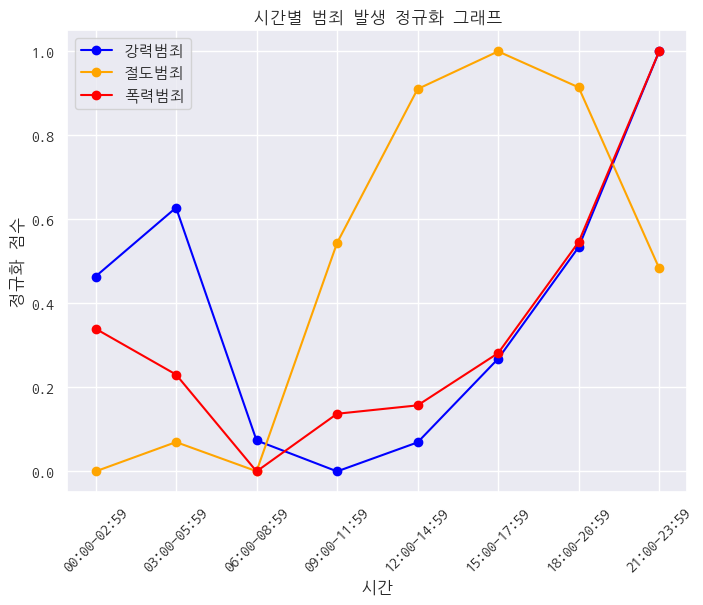

In [208]:
x = crimeTimeTScaled.index
y1 = crimeTimeTScaled['강력범죄'].values
y2 = crimeTimeTScaled['절도범죄'].values
y3 = crimeTimeTScaled['폭력범죄'].values

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y1, c='blue', marker='o', label='강력범죄')
ax.plot(x, y2, c='orange', marker='o', label='절도범죄')
ax.plot(x, y3, c='red', marker='o', label='폭력범죄')

ax.set_title('시간별 범죄 발생 정규화 그래프')
ax.set_xlabel('시간')
ax.set_ylabel('정규화 점수')
plt.xticks(rotation=45)
ax.legend()

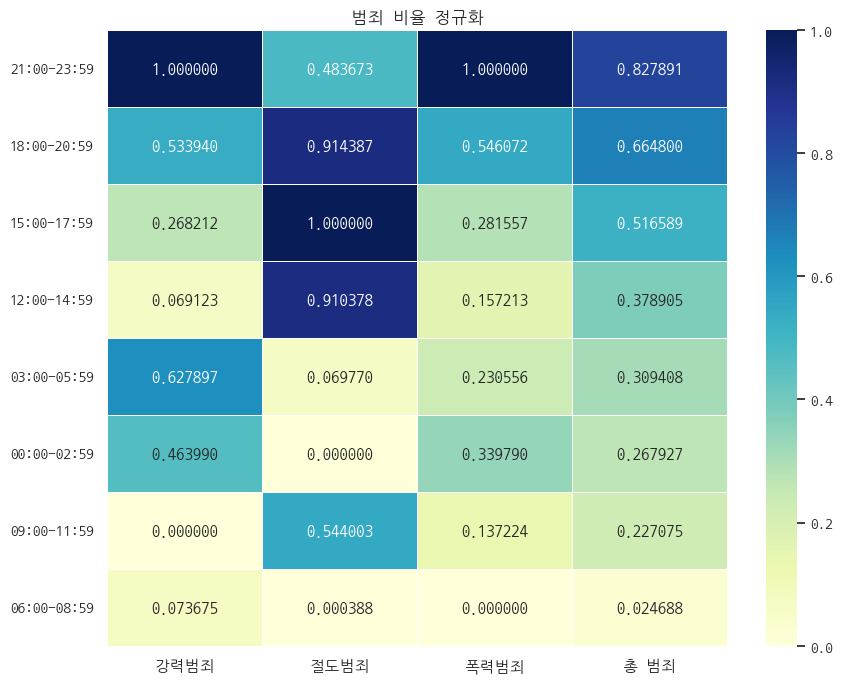

In [209]:
crimeTimeTScaled['총 범죄'] = np.sum(crimeTimeTScaled[column], axis=1) / 3
column.append('총 범죄')
crimeTimeTScaledSort = crimeTimeTScaled.sort_values(by='총 범죄', ascending=False)
plt.figure(figsize=(10, 8))

sns.heatmap(crimeTimeTScaledSort[column], annot=True, fmt='f', linewidths=.5, cmap='YlGnBu')
plt.title('범죄 비율 정규화')
plt.show()

- 강력범죄와 폭력 범죄는 밤에 많이 일어남
- 절도는 오후 시간대에 많이 일어남

##### 지도 시각화 부분은 API 오류 문제로 생략